In [60]:
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

import numpy as np

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, classification_report
import itertools

In [61]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
50000 train samples
10000 test samples


c:\Users\Viraj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Viraj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


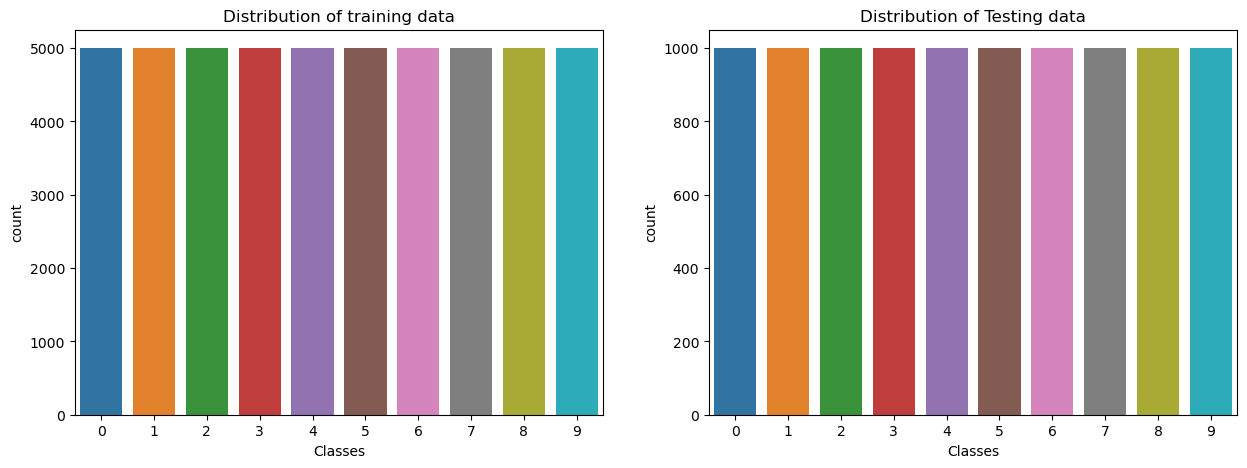

In [62]:
fig, axs = plt.subplots(1,2,figsize=(15,5)) 
# Count plot for training set
sns.countplot(y_train.ravel(), ax=axs[0])
axs[0].set_title('Distribution of training data')
axs[0].set_xlabel('Classes')
# Count plot for testing set
sns.countplot(y_test.ravel(), ax=axs[1])
axs[1].set_title('Distribution of Testing data')
axs[1].set_xlabel('Classes')
plt.show()

In [63]:
batch_size = 100  # The default batch size of keras.
num_classes = 10  # Number of class for the dataset
epochs = 50
data_augmentation = False

In [64]:
# Normalize the data. Before we need to connvert data type to float for computation.
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Convert class vectors to binary class matrices. This is called one hot encoding.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [65]:
#define the convnet
model = Sequential()
# CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# FLATTERN => DENSE => RELU => DROPOUT
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
# a softmax classifier
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 activation_48 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_33 (Conv2D)          (None, 30, 30, 32)        9248      
                                                                 
 activation_49 (Activation)  (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 dropout_24 (Dropout)        (None, 15, 15, 32)        0         
                                                      

In [66]:
# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

In [67]:
history = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs)


Epoch 1/50
500/500 [==============================] - 114s 225ms/step - loss: 1.9724 - accuracy: 0.2737
Epoch 2/50
500/500 [==============================] - 108s 215ms/step - loss: 1.6742 - accuracy: 0.3935
Epoch 3/50
500/500 [==============================] - 109s 218ms/step - loss: 1.5531 - accuracy: 0.4387
Epoch 4/50
500/500 [==============================] - 115s 230ms/step - loss: 1.4691 - accuracy: 0.4694
Epoch 5/50
500/500 [==============================] - 125s 250ms/step - loss: 1.4045 - accuracy: 0.4976
Epoch 6/50
500/500 [==============================] - 123s 246ms/step - loss: 1.3460 - accuracy: 0.5193
Epoch 7/50
500/500 [==============================] - 116s 233ms/step - loss: 1.2980 - accuracy: 0.5360
Epoch 8/50
500/500 [==============================] - 111s 223ms/step - loss: 1.2598 - accuracy: 0.5535
Epoch 9/50
500/500 [==============================] - 119s 238ms/step - loss: 1.2157 - accuracy: 0.5694
Epoch 10/50
500/500 [==============================] - 119s 238m

In [68]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

# make prediction.
pred = model.predict(x_test)

313/313 [==============================] - 5s 15ms/step - loss: 0.6546 - accuracy: 0.7783
Test loss: 0.6546089053153992
Test accuracy: 0.7782999873161316
313/313 [==============================] - 5s 15ms/step
